# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [116]:
%pip install --upgrade plotly

## Import Statements

In [117]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [118]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [119]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?



*   To check the shape of DataFrames



In [120]:
df_hh_income.shape,df_pct_poverty.shape,df_pct_completed_hs.shape,df_share_race_city.shape,df_fatalities.shape

((29322, 3), (29329, 3), (29329, 3), (29268, 7), (2535, 14))



*   To get the information of DataFrames



In [121]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [122]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [123]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [124]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [125]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [126]:
df_hh_income.isnull().sum().sort_values(ascending=False)
df_hh_income.fillna(0,inplace=True)

In [127]:
df_fatalities.isnull().sum().sort_values(ascending=False)


,0
race,195
age,77
flee,65
armed,9
id,0
name,0
date,0
manner_of_death,0
gender,0
city,0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [128]:
df_pct_poverty['poverty_rate']=pd.to_numeric(df_pct_poverty['poverty_rate'],errors='coerce')
df_pct_poverty.fillna(0,inplace=True)
grouped_states = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
sorted_states = grouped_states.sort_values(by='poverty_rate')

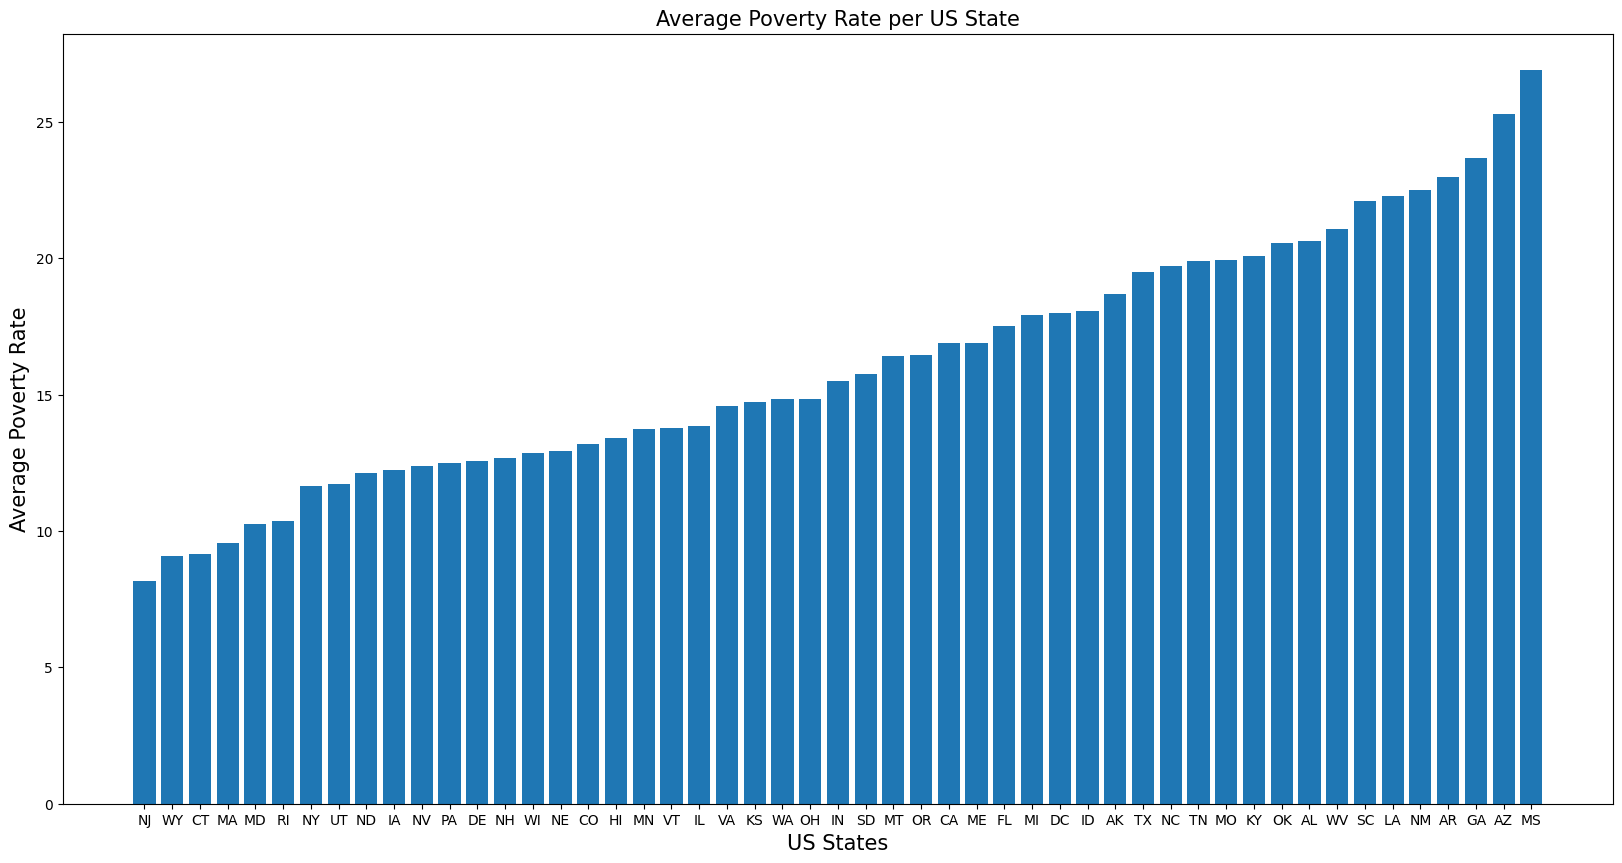

In [129]:
plt.figure(figsize=(20,10))
plt.bar(sorted_states['Geographic Area'], sorted_states['poverty_rate'])
plt.xlabel('US States',fontsize=15)
plt.ylabel('Average Poverty Rate',fontsize=15)
plt.title('Average Poverty Rate per US State',fontsize=15)
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [130]:
df_pct_completed_hs['percent_completed_hs']=pd.to_numeric(df_pct_completed_hs['percent_completed_hs'],errors='coerce')
df_pct_completed_hs.fillna(0,inplace=True)
grouped_percent = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()
sorted_percent = grouped_percent.sort_values(by='percent_completed_hs')

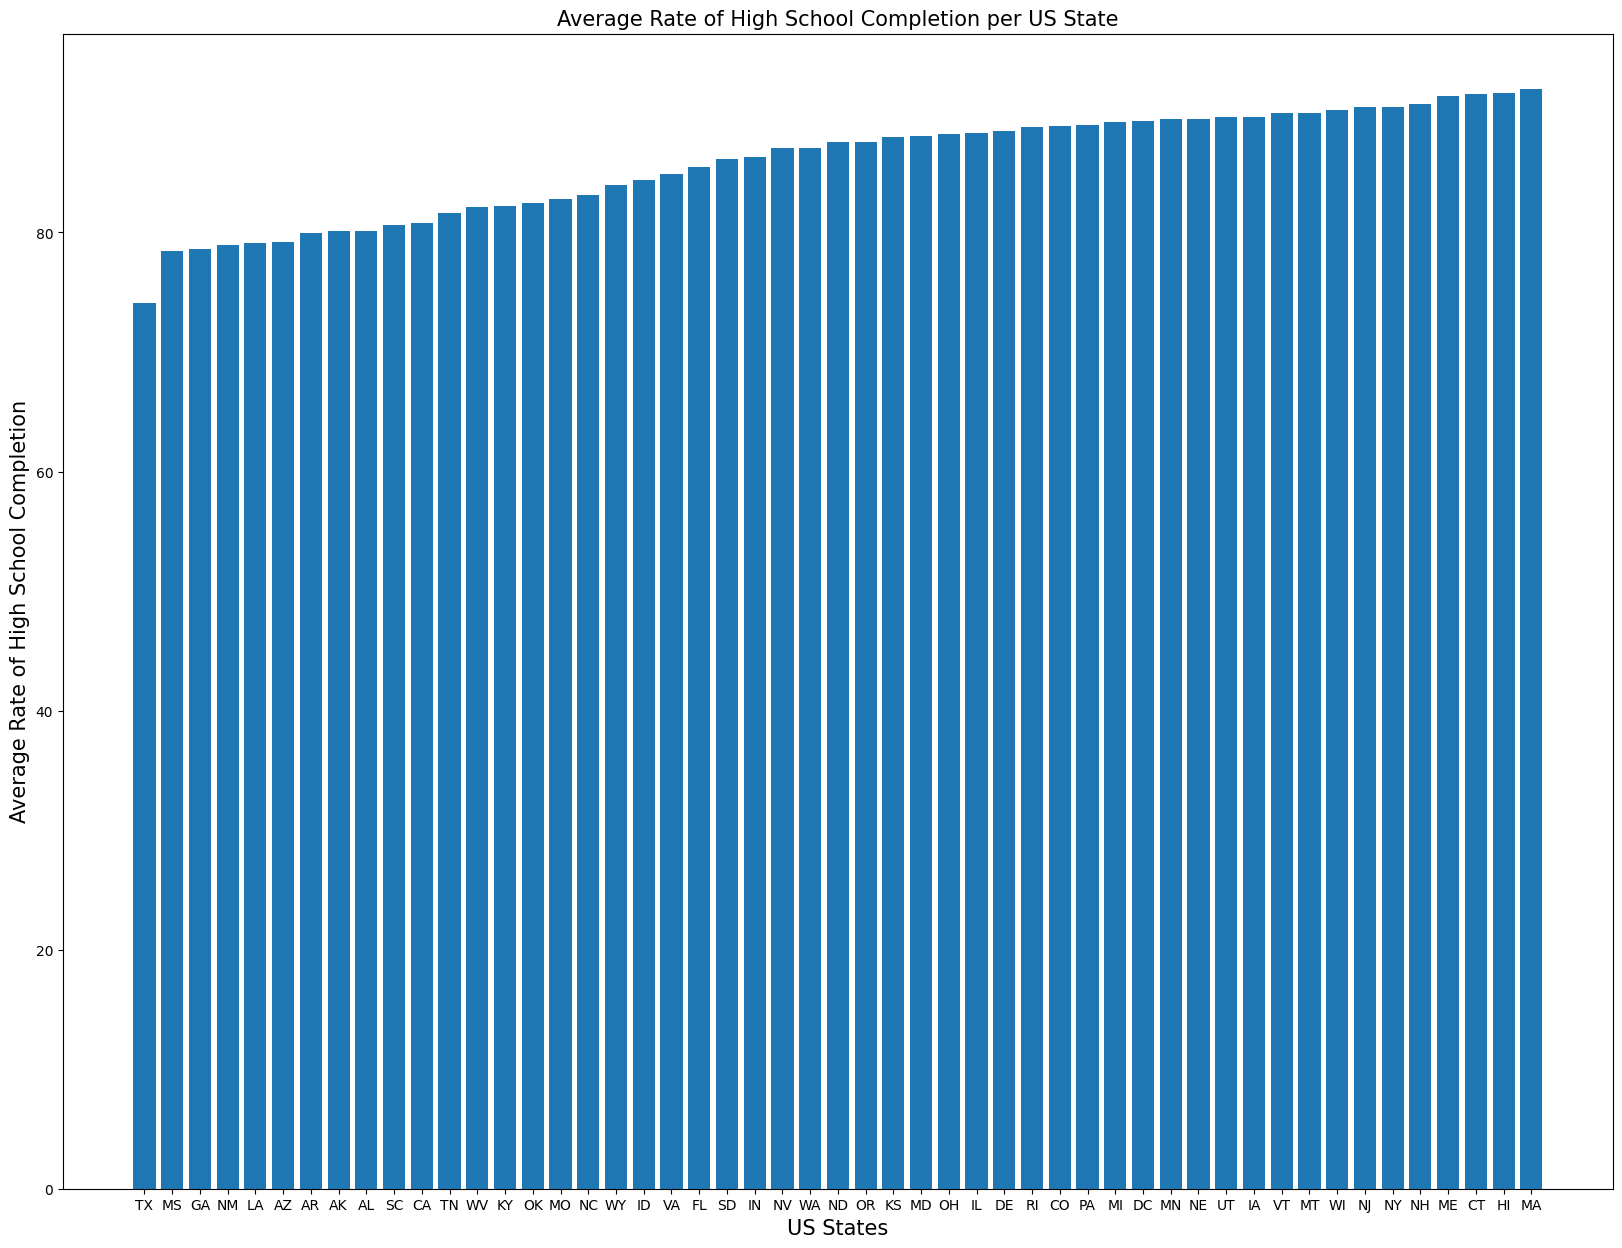

In [131]:
plt.figure(figsize=(20,15))
plt.bar(sorted_percent['Geographic Area'], sorted_percent['percent_completed_hs'])
plt.xlabel('US States',fontsize=15)
plt.ylabel('Average Rate of High School Completion',fontsize=15)
plt.title('Average Rate of High School Completion per US State',fontsize=15)
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

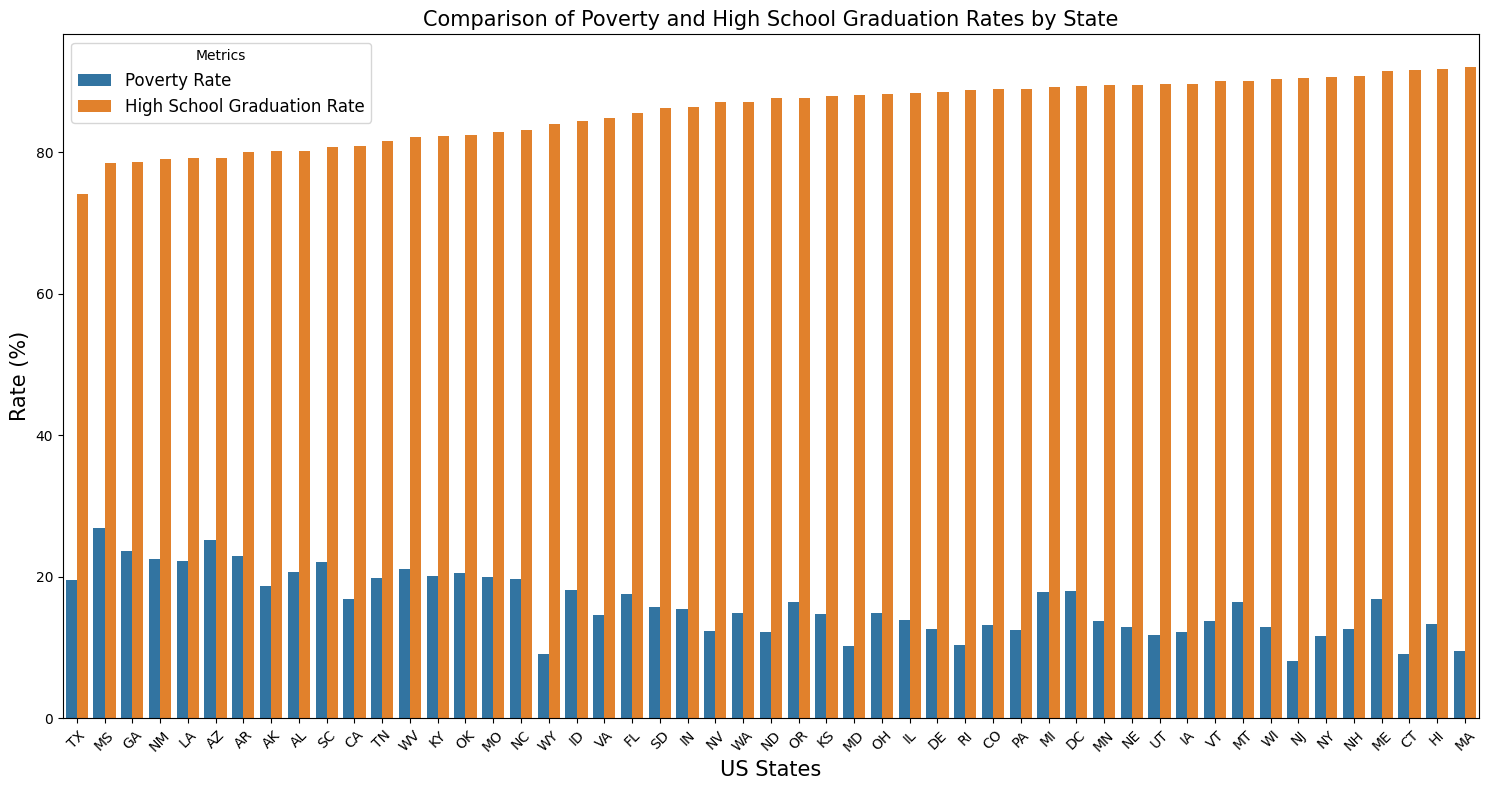

In [132]:
merged_df = pd.merge(sorted_states, sorted_percent, on='Geographic Area')
merged_df = merged_df.sort_values('percent_completed_hs')
merged_df.rename(columns={'poverty_rate': 'Poverty Rate', 'percent_completed_hs': 'High School Graduation Rate'}, inplace=True)

melted_df = pd.melt(merged_df, id_vars=['Geographic Area'], value_vars=['Poverty Rate', 'High School Graduation Rate'])

plt.figure(figsize=(15, 8))
sns.barplot(x='Geographic Area', y='value', hue='variable', data=melted_df)

plt.xlabel('US States',fontsize=15)
plt.ylabel('Rate (%)',fontsize=15)
plt.title('Comparison of Poverty and High School Graduation Rates by State',fontsize=15)
plt.legend(title='Metrics', fontsize='large')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

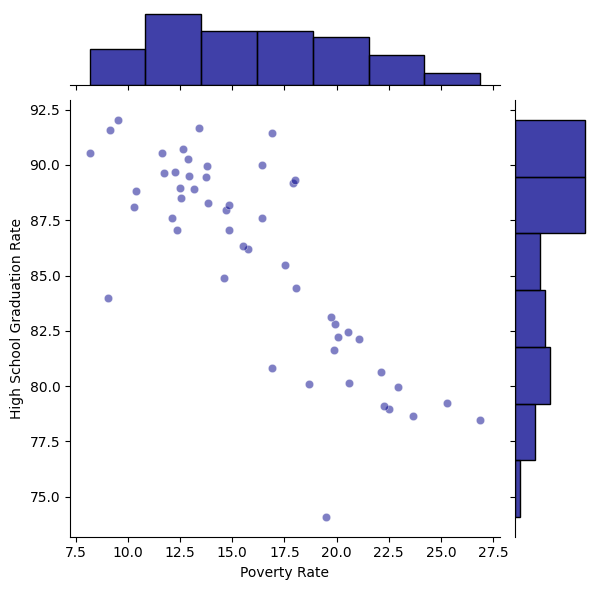

In [133]:
sns.jointplot(x='Poverty Rate',y='High School Graduation Rate',data=merged_df,kind="scatter",color="darkblue",joint_kws={'alpha':0.5})

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

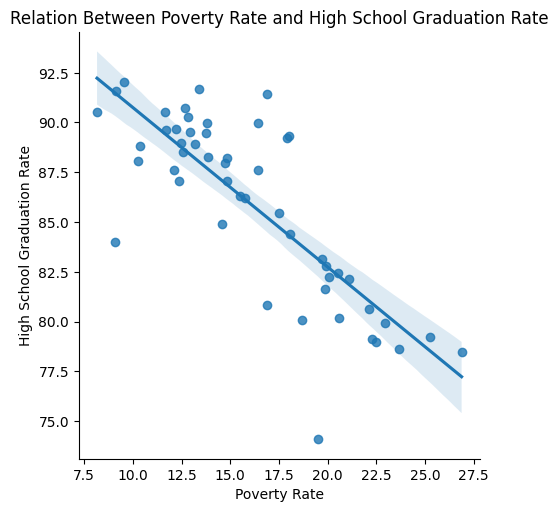

In [134]:
sns.lmplot(x='Poverty Rate', y='High School Graduation Rate', data=merged_df)

plt.title('Relation Between Poverty Rate and High School Graduation Rate')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [135]:
col_convert = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[col_convert] = df_share_race_city[col_convert].replace('(X)', '0')

df_share_race_city[col_convert] = df_share_race_city[col_convert].apply(pd.to_numeric)
grouped_state_races = df_share_race_city.groupby('Geographic area').mean(numeric_only=True).reset_index()

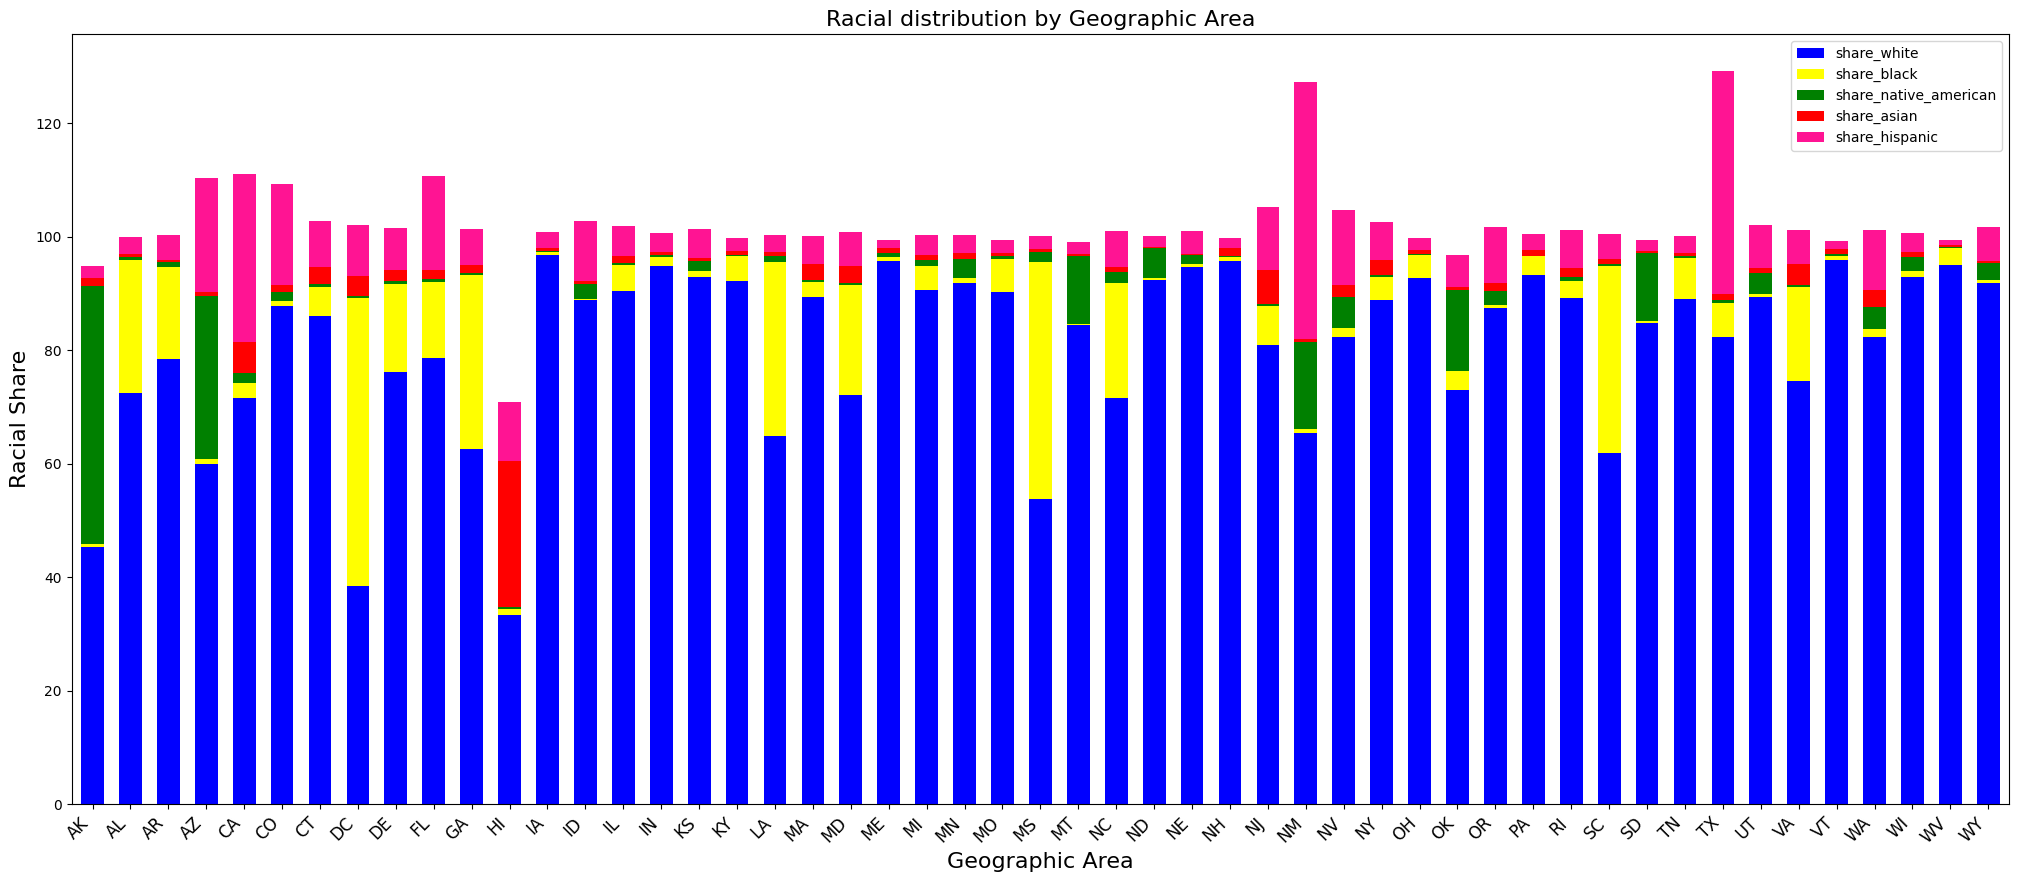

In [136]:
df_distribution = grouped_state_races.set_index('Geographic area')

df_distribution.plot(kind='bar', stacked=True, color=['blue', 'yellow', 'green', 'red', 'deeppink'], figsize=(25, 10), width=0.6)

plt.xlabel('Geographic Area', fontsize=16)
plt.ylabel('Racial Share', fontsize=16)
plt.title('Racial distribution by Geographic Area', fontsize=16)

plt.xticks(rotation=45, fontsize=12, ha='right')

plt.show()

# Create Donut Chart by of People Killed by Race

In [137]:
df_fatalities['race'] = df_fatalities['race'].replace({
    'W': 'White',
    'B': 'Black',
    'O': 'Other',
    'A': 'Asian',
    'H': 'Hispanic',
    'N': 'Native americans'
})

In [138]:
killed_by_race = df_fatalities.groupby('race')['id'].count()
killed_by_race

,id
race,
Asian,39
Black,618
Hispanic,423
Native americans,31
Other,28
White,1201


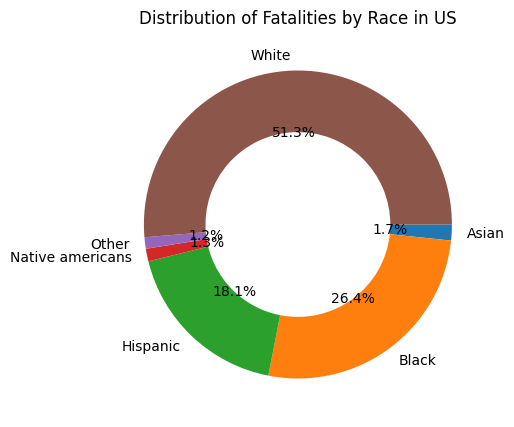

In [139]:
plt.figure(figsize=(10, 5))
plt.pie(killed_by_race, labels=killed_by_race.index, counterclock=False, wedgeprops=dict(width=0.4), autopct='%1.1f%%')

plt.title('Distribution of Fatalities by Race in US')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [140]:
genders_killed = df_fatalities.groupby('gender')['id'].count()
genders_killed

,id
gender,
F,107
M,2428


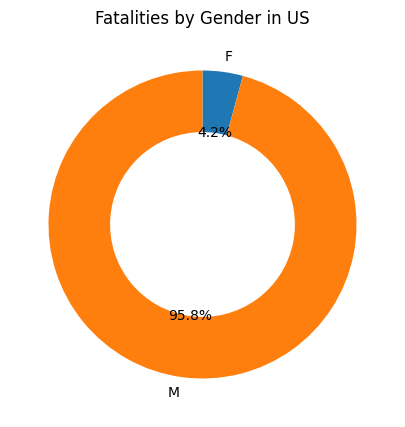

In [141]:
plt.figure(figsize=(10, 5))
plt.pie(genders_killed, labels=genders_killed.index, counterclock=False,startangle=90, wedgeprops=dict(width=0.4), autopct='%1.1f%%')

plt.title('Fatalities by Gender in US')

plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [142]:
victims_armed = df_fatalities.groupby('armed')['id'].count()
victims_armed

,id
armed,
Taser,9
air conditioner,1
ax,9
baseball bat,8
baseball bat and bottle,1
...,...
toy weapon,104
unarmed,171
undetermined,117


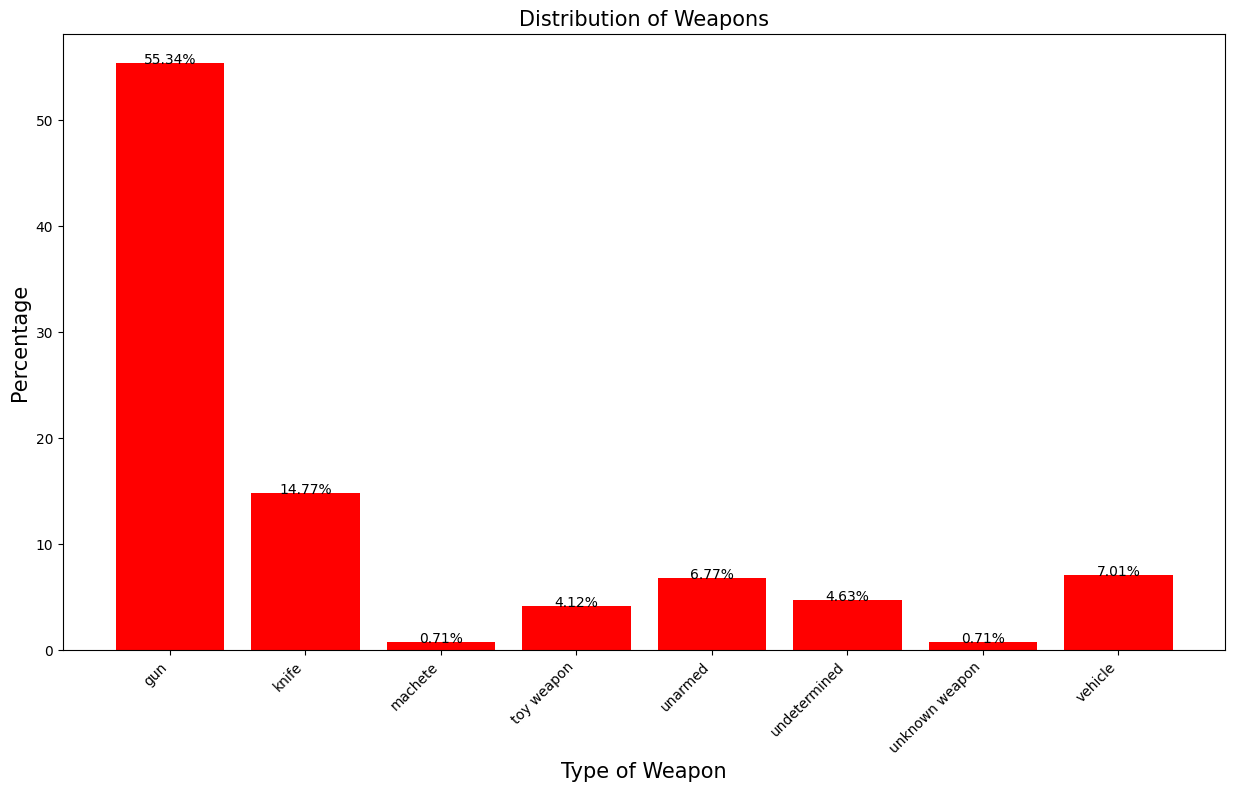

In [143]:
total = victims_armed.sum()
armed_percentage = (victims_armed / total) * 100
filtered_armed_percentage = armed_percentage[armed_percentage >= 0.7]

plt.figure(figsize=(15, 8))

plt.bar(filtered_armed_percentage.index, filtered_armed_percentage.values, color='red')

plt.xlabel('Type of Weapon',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Distribution of Weapons',fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=10)

for i, value in enumerate(filtered_armed_percentage.values):
    plt.text(i, value, f"{value:.2f}%", ha='center')

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [144]:
victim_age = df_fatalities.groupby('age')['id'].count()
total_age = victim_age.sum()
age_percentage = (victim_age / total_age) * 100
total_below_25 = age_percentage.loc[0:25].sum()
print(f"Percentage of victims below 25 years old : {round(total_below_25, 2)}%")

Percentage of victims below 25 years old : 22.5%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

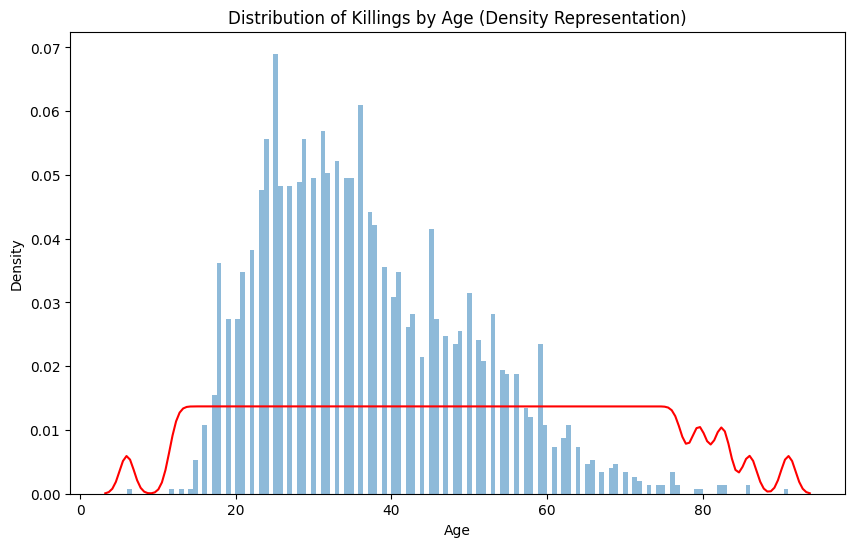

In [145]:
plt.figure(figsize=(10, 6))

plt.hist(victim_age.index, bins=140, weights=victim_age.values, alpha=0.5, density=True)

sns.kdeplot(victim_age.index, color='red', bw_adjust=0.1)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Killings by Age (Density Representation)')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

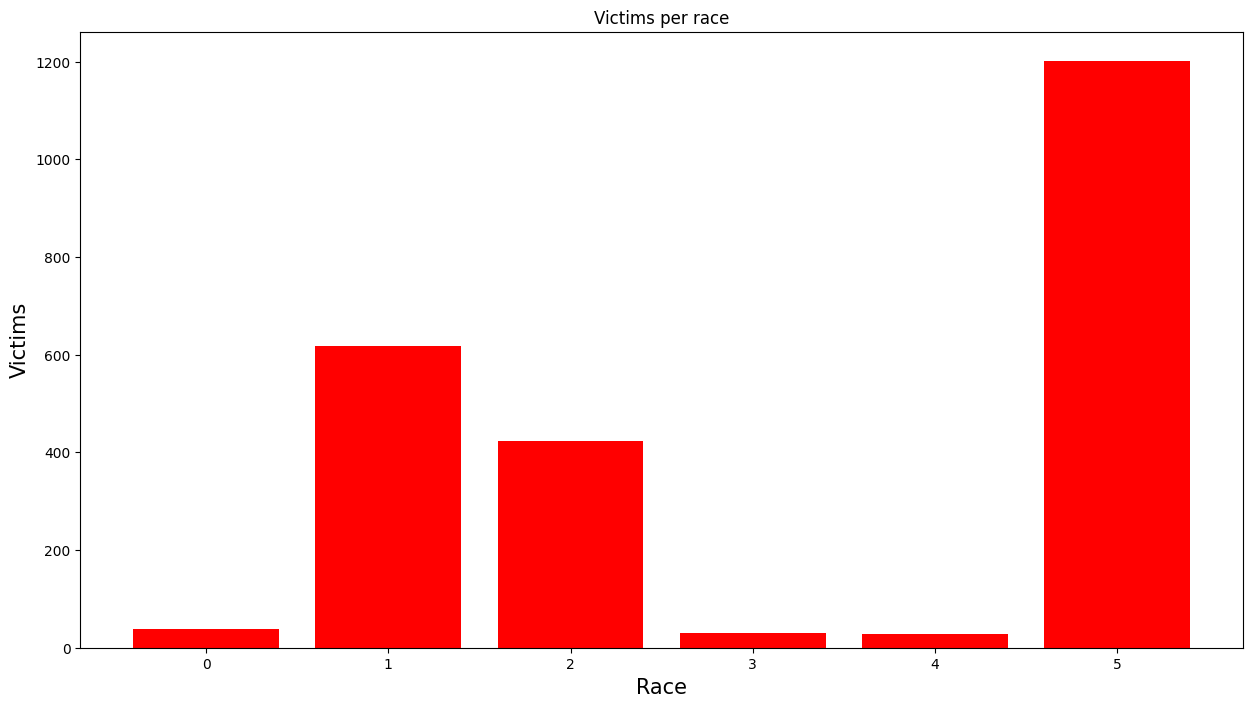

In [146]:
plt.figure(figsize=(15, 8))

x_coords = np.arange(len(killed_by_race.index))

plt.bar(x_coords, killed_by_race.values, color='red')

plt.xlabel('Race',fontsize=15)
plt.ylabel('Victims',fontsize=15)
plt.title('Victims per race')
plt.xticks(ha="center", fontsize=10)

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [147]:
mental_illness = df_fatalities.groupby('signs_of_mental_illness')['id'].count()
mental_illness

,id
signs_of_mental_illness,
False,1902
True,633


In [148]:
percentage_ill = mental_illness[True] / mental_illness.sum() * 100
print(f"The percentage of victims diagnosed with mental illness is {round(percentage_ill)}%")

The percentage of victims diagnosed with mental illness is 25%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [149]:
dangerous_cities = df_fatalities.groupby('city')['id'].count()
top_10_cities = dangerous_cities.sort_values(ascending=False).head(10)
top_10_cities

,id
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Miami,18
Austin,18


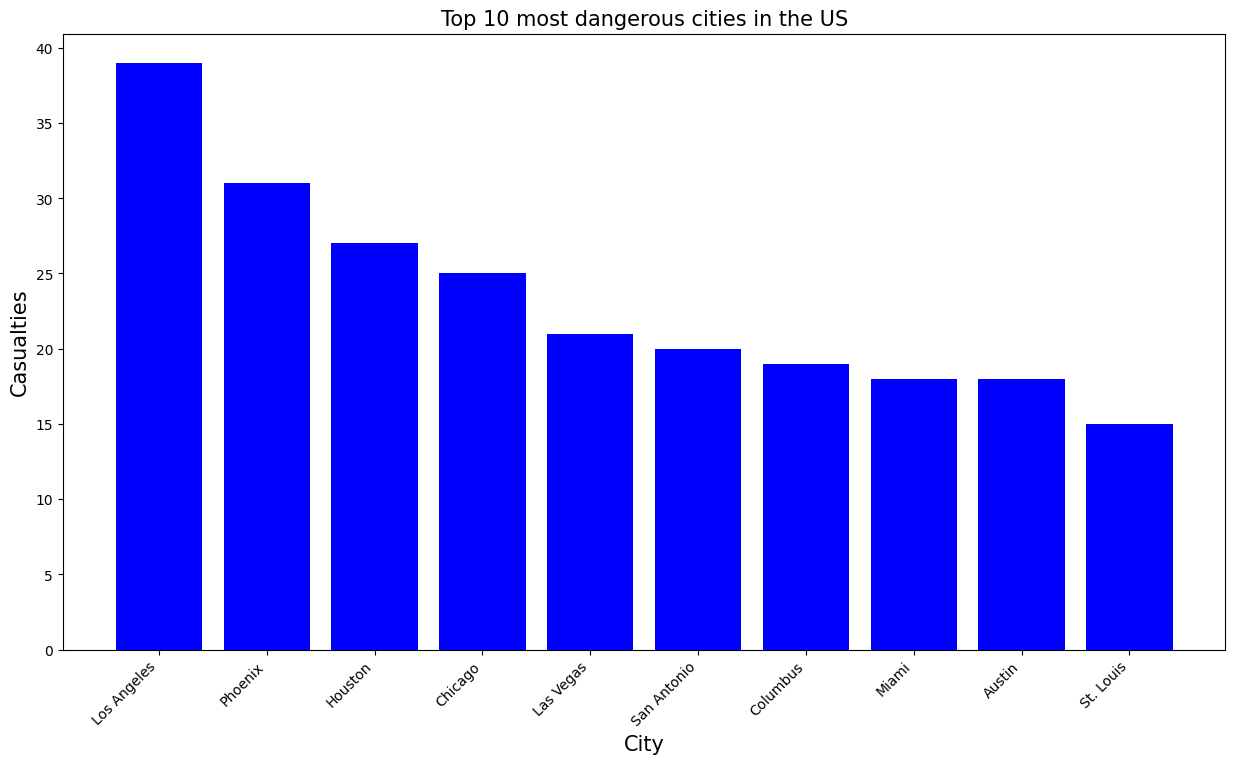

In [150]:
plt.figure(figsize=(15, 8))

plt.bar(top_10_cities.index, top_10_cities.values, color='blue')

plt.xlabel('City',fontsize=15)
plt.ylabel('Casualties',fontsize=15)
plt.title('Top 10 most dangerous cities in the US',fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=10)



plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

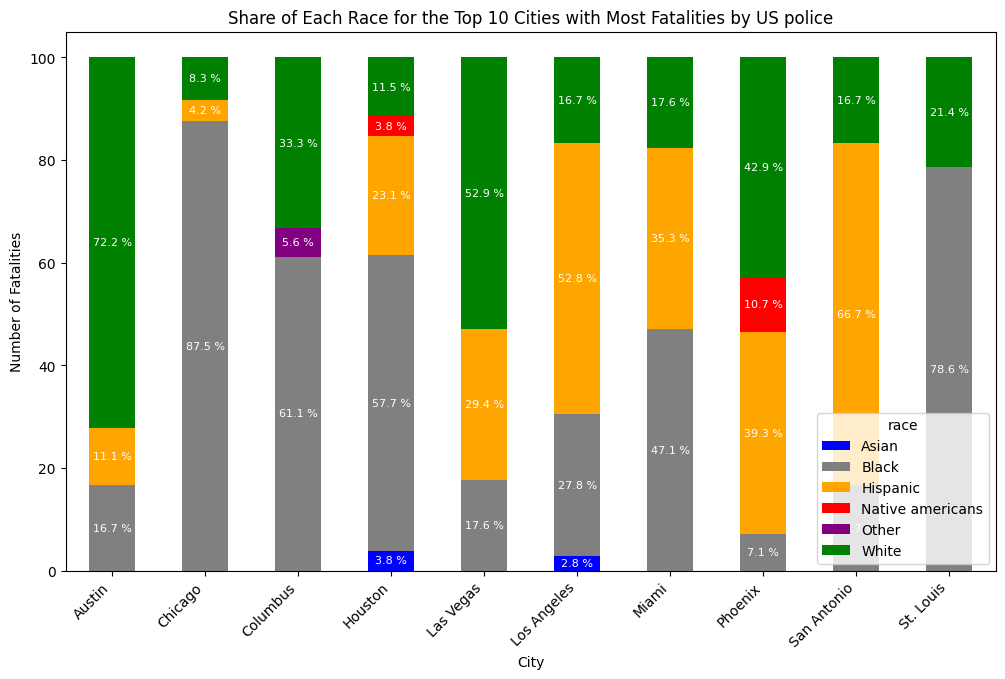

In [151]:
filtered_fatalities = df_fatalities[df_fatalities['city'].isin(top_10_cities.index)]

race_counts = filtered_fatalities.groupby(['city', 'race']).size().unstack(fill_value=0)

race_counts_normalized = race_counts.div(race_counts.sum(axis=1), axis=0) * 100

colors = ['blue', 'grey', 'orange', 'red', 'purple', 'green']


ax = race_counts_normalized.plot(kind='bar', stacked=True, figsize=(12,7), color=colors)
plt.title('Share of Each Race for the Top 10 Cities with Most Fatalities by US police')
plt.ylabel('Number of Fatalities')
plt.xlabel('City')
plt.xticks(rotation=45, ha="right", fontsize=10)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x+width/2,
                y+height/2,
                '{:.1f} %'.format(height),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=8,
                color='white')

plt.show()

#Create a Choropleth Map of Police Killings by US State

 Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [152]:
deaths_by_state = df_fatalities.groupby('state')['id'].count().reset_index(name='count')
fig = px.choropleth(deaths_by_state, locations='state', color='count', locationmode="USA-states", scope="usa", title='Police Killings by US State', color_continuous_scale='Reds')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [153]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y')

monthly_killings = df_fatalities.resample('ME', on='date').size()

In [154]:
monthly_killings_df = monthly_killings.reset_index()
monthly_killings_df.columns = ['Date', 'Killings']

In [155]:
fig = px.line(monthly_killings_df, x='Date', y='Killings', title='Trend of Killings Over Time by Month')
fig.add_scatter(x=monthly_killings_df['Date'], y=monthly_killings_df['Killings'].rolling(6).mean(), mode='lines', name='6-months Rolling Avg', line=dict(color='red', dash='dash'))

fig.show()